In [1]:
#importing all te req lib
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.constraints import maxnorm
from keras import backend as K
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 28, 28

#defining the data directories
train_data_dir= 'data/train'
validation_data_dir= 'data/validation'
n_training_sample= 580
n_validation_sample= 100
epochs=10
batch_size=32

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
#create model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
    
model.add(Dense(64, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

In [5]:
#defining the optimizer and metrics
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=90.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=n_training_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=n_validation_sample // batch_size)

Found 577 images belonging to 2 classes.
Found 99 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
18/18 [==============================] - 237s 13s/step - loss: 0.6780 - accuracy: 0.5394 - val_loss: 0.6542 - val_accuracy: 0.6562
Epoch 2/10
18/18 [==============================] - 239s 13s/step - loss: 0.5540 - accuracy: 0.7303 - val_loss: 0.5613 - val_accuracy: 0.6866
Epoch 3/10
18/18 [==============================] - 195s 11s/step - loss: 0.5051 - accuracy: 0.7541 - val_loss: 0.6652 - val_accuracy: 0.6716
Epoch 4/10
18/18 [==============================] - 165s 9s/step - loss: 0.4406 - accuracy: 0.8092 - val_loss: 0.1126 - val_accuracy: 0.7015
Epoch 5/10
18/18 [==============================] - 205s 11s/step - loss: 0.4453 - accuracy: 0.7890 - val_loss: 0.8241 - val_accuracy: 0.6250
Epoch 6/10
18/18 [==============================] - 265s 15s/step - loss: 0.4517 - accuracy: 0.7761 - val_loss: 0.38

In [10]:
print(validation_generator.class_indices)

{'ice-cream': 0, 'waffle': 1}


In [ ]:
#testing the model
pred= image.load_img('data/test/00000370.jpg', target_size=(28,28))
pred=image.img_to_array(pred)
pred= np.expand_dims(pred, axis=0) 
result= model.predict(pred)
print(result[0])

In [ ]:
if result[0][0]==1:
    answer='ice-cream'
else:
    answer='waffle'
print("The delicacy in the image is",answer, "!!")

Text(0.5, 1.0, 'Accuracy Curves')

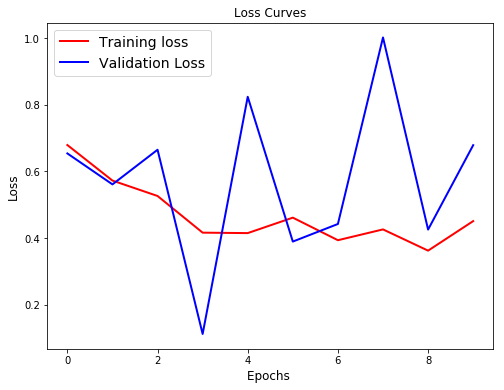

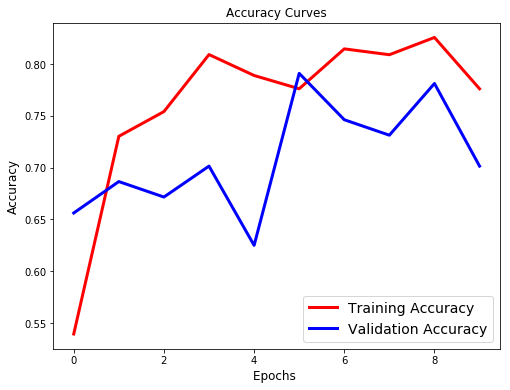

In [12]:
 import matplotlib. pyplot as plt 
    
# Loss Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.title('Loss Curves',fontsize=12) 

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy Curves',fontsize=12)
